# Clonamos el repositorio para obtener los dataSet

In [ ]:
!git clone https://github.com/joanby/machinelearning-az.git

# Damos acceso a nuestro Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Test it

In [ ]:
!ls '/content/drive/My Drive' 

# Google colab tools

In [ ]:
from google.colab import files # Para manejar los archivos y, por ejemplo, exportar a su navegador
import glob # Para manejar los archivos y, por ejemplo, exportar a su navegador
from google.colab import drive # Montar tu Google drive

# Instalar dependendias

In [ ]:
!pip install sklearn

# Regresión Logística


# Cómo importar las librerías


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importar el data set


In [3]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2,3]].values # edad y sueldo estimado (poner [2,3,n] para seleccionar las columnas no consecutivas que se quieran utilizar)
y = dataset.iloc[:, 4].values # si compró o no el producto (podemos poner tambien [:,-1] para seleccionar la última)
# Cada observación posee datos de un usuario virtual, siendo la categoria a predecir si compró (1) o no (0) un producto ofrecido
# Se marca como 1 generalmente al caso favorable (al que queremos tender, en caso de ser binomial)

# Dividir el data set en conjunto de entrenamiento y conjunto de testing


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Escalado de variables

In [5]:
# Reescalamos la matriz de características para que priorice el modelo para su predicción de igual manera a la edad como al salario (esta última dominaría para tomar decisiones si no reescaláramos)
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test) # ya han sido entrenados anteriormente
# Como el vector Y ya viene catalogada como 0 o 1 (respectivas probabilidades de ocurrencia del hecho), no necesito reescalarlo

# Ajustar el modelo de Regresión Logística en el Conjunto de Entrenamiento

In [6]:
from sklearn.linear_model import LogisticRegression 

In [7]:
classifier = LogisticRegression(random_state = 0) # C, tol, dual, penalty
classifier.fit(X_train, y_train) # aprende de los datos de entrenamiento a clasificar
print(classifier.get_params()) # para ver los parámetros de la regresión hecha
print(classifier.score(X_train,y_train)) # vemos el accuracy de la predicción de la clasificación (con datos de entrenamiento)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': 0, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
0.8233333333333334


# Predicción de los resultados con el Conjunto de Testing


In [8]:
y_pred  = classifier.predict(X_test)

# Elaborar una matriz de confusión

In [9]:
from sklearn.metrics import confusion_matrix

In [10]:
# Elaboramos una matriz de confusión para ver el grado de acierto de las predicciones del modelo sobre el conjunto de test
cm = confusion_matrix(y_test, y_pred) # labels: configurar etiquetas para los resultados categóricos
cm
# Vemos lo siguiente:
# - 65 casos fueron correctamente clasificadas como no compra (0)
# - 24 casos fueron correctamente clasificados como compra (1)
# - en 3 casos el modelo predijo 1, pero verdaderamente era 0 
# - en 8 casos el modelo predijo 0, pero verdaderamente era 1
# Acierto total del modelo(sin tener en cuenta desbalances entre clases) = 89 / 100 = 0,89 accuracy de la predicción del modelo con respecto a los datos de test

array([[65,  3],
       [ 8, 24]], dtype=int64)

# Representación gráfica de los resultados del algoritmo en el Conjunto de Entrenamiento

In [11]:
from matplotlib.colors import ListedColormap

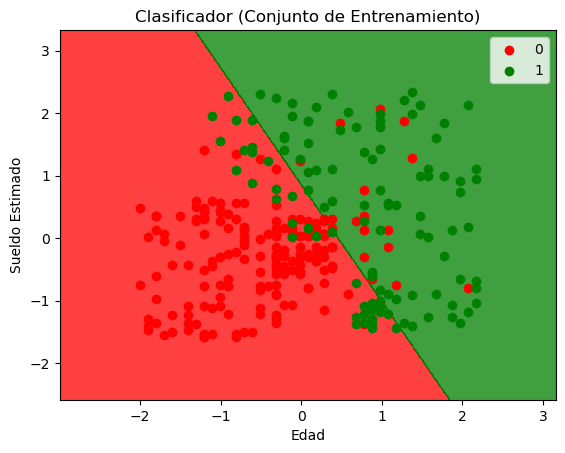

In [27]:
# Vemos el límite de nuestro clasificador con respecto a los datos de train (82% de accuracy antes marcado). Usamos 2 variables indep para visualizar la clasificación en un gráfico 2D (podemos usar 3 para 3D, o reducir dimensiones si tenemos más)

# Creamos una matriz de píxeles fina que represente a todos los usuarios que el modelo catalogará de una manera cuando caigan dentro de su zona, zonas delimitadas por la frontera de la predicción
# Crear el grid para el contorno
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

# Predecir sobre el grid de puntos y reshape para contorno
Z = classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

# Definir la paleta de colores usando códigos RGB 
colors = [(1, 0, 0), (0, 0.5, 0)] # rojo (no compra) y verde oscuro (compra) [(valor 0 de pred, valor 1 de pred)]
cmap = ListedColormap(colors)

# Graficar el contorno y los puntos de datos
plt.contourf(X1, X2, Z, alpha=0.75, cmap=cmap)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Graficar los puntos de datos con scatter
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color=cmap(i), label=j)

# Agregar títulos y etiquetas
plt.title('Clasificador (Conjunto de Entrenamiento)')
plt.xlabel('Edad')
plt.ylabel('Sueldo Estimado')
plt.legend()
plt.show()

# Como edad y sueldo están estandarizados, no estamos viendo sus valores reales (transformar para ver en ejes)
# Rojo sería no compra, y verde compra: Podemos ver que los usuarios que no han comprado son generalmente jóvenes con bajo sueldo,
# mientras que la gente mayor, con medio y alto nivel adquisitivo se han decantado por comprar (por supuesto que hay excepciones en cada decisión)
# También, esos valores no clasificados correctamente por el algoritmo podrían deberse a otras características que no estamos tomando en cuenta (solo tomamos edad y sueldo para predecir compras en nuestros clientes)
# (probar con incluir el género y ver la matriz de confusión)
# Con este análisis podríamos aconsejar a una campaña de marketing para que difunda su publicidad a personas con un mayor sueldo/edad
# Vemos que la frontera de la predicción de la Regresión Logistica es lineal, al basarse de fondo en una Regresión Lineal (si estuvieramos en 3D, con 3 características, sería un plano en vez de una recta)
# Esta recta es la mejor que separa/categoriza a los datos para el modelo. A lo mejor con una categorización no lineal mejoraría un poco con respecto a train

# Representación gráfica de los resultados del algoritmo en el Conjunto de Testing

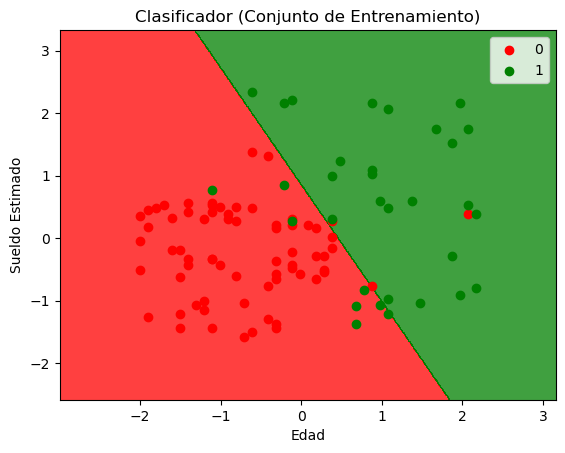

In [28]:
# Vemos el límite de nuestro clasificador (el mismo que antes, ya que fue elaborado tomando el set de train) con respecto a los datos de test (89% de accuracy)
# Es similar al análisis con la matriz de confusión. 

# Creamos una matriz de píxeles fina que represente a todos los usuarios que el modelo catalogará de una manera cuando caigan dentro de su zona, zonas delimitadas por la frontera de la predicción
# Crear el grid para el contorno
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

# Predecir sobre el grid de puntos y reshape para contorno
Z = classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

# Definir la paleta de colores usando códigos RGB 
colors = [(1, 0, 0), (0, 0.5, 0)] # rojo (no compra) y verde oscuro (compra) [(valor 0 de pred, valor 1 de pred)]
cmap = ListedColormap(colors)

# Graficar el contorno y los puntos de datos
plt.contourf(X1, X2, Z, alpha=0.75, cmap=cmap)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Graficar los puntos de datos con scatter
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color=cmap(i), label=j)

# Agregar títulos y etiquetas
plt.title('Clasificador (Conjunto de Entrenamiento)')
plt.xlabel('Edad')
plt.ylabel('Sueldo Estimado')
plt.legend()
plt.show()

# Me clasifica los nuevos datos de test con el mismo separador lineal obtenido/entrenado con train